## Multivariants linear regression

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
!pip install word2number

In [2]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df.experience = df.experience.fillna("zero")

In [4]:
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)


In [13]:
import math
q3_test = math.floor(df['test_score(out of 10)'].median())
q3_test

8

In [14]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(q3_test)
df

,experience,test_score(out of 10),interview_score(out of 10),salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [15]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience',"test_score(out of 10)","interview_score(out of 10)"]],df.salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict the salary of candidate having 2 years experienced, scored 9 in test and score 6 in interview

In [16]:
reg.predict(np.array([2,9,6]).reshape(1,3))

array([53205.96797671])

## Predict the salary of candidate having 12 years experienced, scored 10 in test and score 10 in interview

In [17]:
reg.predict(np.array([12,10,10]).reshape(1,3))

array([92002.18340611])

## Slope coefficient for each independent variables

In [18]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

## Y-intercept of linear regression

In [19]:
reg.intercept_

17737.26346433771

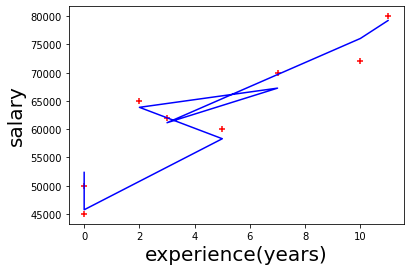

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("experience(years)", fontsize = 20)
plt.ylabel("salary", fontsize = 20)
plt.scatter(df.experience,df.salary, color='red', marker='+')
plt.plot(df.experience,reg.predict(df[['experience',"test_score(out of 10)","interview_score(out of 10)"]]),color='blue')